In [1]:
#Dataset:https://raw.githubusercontent.com/sahilrahman12/Technology-Lookup-Web-Application/main/technologies.json

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import requests

In [3]:
url = "https://github.com/ozlerhakan/mongodb-json-files/raw/master/datasets/restaurant.json"

# Download the JSON file locally
filename = "restaurant.json"
response = requests.get(url)
with open(filename, "wb") as f:
    f.write(response.content)

# Read the JSON file using Pandas
df = pd.read_json(filename, lines=True)


In [4]:
df.head()

,URL,_id,address,address line 2,name,outcode,postcode,rating,type_of_food
0,http://www.just-eat.co.uk/restaurants-cn-chine...,{'$oid': '55f14312c7447c3da7051b26'},228 City Road,Cardiff,.CN Chinese,CF24,3JH,5,Chinese
1,http://www.just-eat.co.uk/restaurants-atthai-s...,{'$oid': '55f14312c7447c3da7051b27'},376 Rayleigh Road,Essex,@ Thai,SS9,5PT,5.5,Thai
2,http://www.just-eat.co.uk/restaurants-atthaire...,{'$oid': '55f14312c7447c3da7051b28'},30 Greyhound Road Hammersmith,London,@ Thai Restaurant,W6,8NX,4.5,Thai
3,http://www.just-eat.co.uk/restaurants-atthaire...,{'$oid': '55f14312c7447c3da7051b29'},30 Greyhound Road Hammersmith,London,@ Thai Restaurant,W6,8NX,4.5,Thai
4,http://www.just-eat.co.uk/restaurants-indianco...,{'$oid': '55f14312c7447c3da7051b2a'},9 Broughton Hall Road,Broughton,@Indian.com,CH4,0QR,6,Curry


In [5]:
df.shape

(2548, 9)

In [6]:
df.columns

Index(['URL', '_id', 'address', 'address line 2', 'name', 'outcode',
       'postcode', 'rating', 'type_of_food'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2548 entries, 0 to 2547
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   URL             2548 non-null   object
 1   _id             2548 non-null   object
 2   address         2548 non-null   object
 3   address line 2  2548 non-null   object
 4   name            2548 non-null   object
 5   outcode         2548 non-null   object
 6   postcode        2548 non-null   object
 7   rating          2548 non-null   object
 8   type_of_food    2548 non-null   object
dtypes: object(9)
memory usage: 179.3+ KB


In [8]:
df.describe()

,URL,_id,address,address line 2,name,outcode,postcode,rating,type_of_food
count,2548,2548,2548,2548,2548,2548,2548,2548,2548
unique,1911,2548,1878,650,1586,983,1307,12,52
top,http://www.just-eat.co.uk/restaurants-bambooba...,{'$oid': '55f14312c7447c3da7051b26'},Unit 23 55-59 Weir Road,London,Best Kebab,N1,6AA,5,Curry
freq,7,1,7,345,30,29,12,1107,902


# Accessing data from specific columns:

In [10]:
# Accessing data from the 'name' column
names = df['name']
names

0                  .CN Chinese
1                       @ Thai
2            @ Thai Restaurant
3            @ Thai Restaurant
4                  @Indian.com
                 ...          
2543    Blue Bengal Restaurant
2544    Blue Bengal Restaurant
2545                  Blue Box
2546      Blue Breeze Fish Bar
2547      Blue Breeze Fish Bar
Name: name, Length: 2548, dtype: object

In [12]:
# Accessing data from the 'rating' column
ratings = df['rating']
ratings

0         5
1       5.5
2       4.5
3       4.5
4         6
       ... 
2543    4.5
2544    4.5
2545      5
2546    5.5
2547    5.5
Name: rating, Length: 2548, dtype: object

In [13]:
# Accessing data from the 'type_of_food' column
food_types = df['type_of_food']
food_types

0            Chinese
1               Thai
2               Thai
3               Thai
4              Curry
            ...     
2543           Curry
2544           Curry
2545           Grill
2546    Fish & Chips
2547    Fish & Chips
Name: type_of_food, Length: 2548, dtype: object

# Performing operations on specific columns:

In [18]:
# Convert non-numeric values in the 'rating' column to NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')


In [19]:

# Calculating the mean rating
mean_rating = df['rating'].mean()
print("Mean Rating:", mean_rating)



Mean Rating: 4.907042253521126


In [15]:

# Counting the number of unique food types
num_food_types = df['type_of_food'].nunique()
num_food_types


52

In [20]:
# Filtering the DataFrame based on a condition in the 'rating' column
highly_rated_restaurants = df[df['rating'] > 4.5]
print("Highly Rated Restaurants:")
print(highly_rated_restaurants)



Highly Rated Restaurants:
                                                    URL  \
0     http://www.just-eat.co.uk/restaurants-cn-chine...   
1     http://www.just-eat.co.uk/restaurants-atthai-s...   
4     http://www.just-eat.co.uk/restaurants-indianco...   
5     http://www.just-eat.co.uk/restaurants-007takea...   
11    http://www.just-eat.co.uk/restaurants-100-degr...   
...                                                 ...   
2541  http://www.just-eat.co.uk/restaurants-blue-bay...   
2542  http://www.just-eat.co.uk/restaurants-bluebell...   
2545  http://www.just-eat.co.uk/restaurants-blue-box...   
2546  http://www.just-eat.co.uk/restaurants-bluebree...   
2547  http://www.just-eat.co.uk/restaurants-bluebree...   

                                       _id                     address  \
0     {'$oid': '55f14312c7447c3da7051b26'}               228 City Road   
1     {'$oid': '55f14312c7447c3da7051b27'}           376 Rayleigh Road   
4     {'$oid': '55f14312c7447c3da7051b2a'} 

In [21]:
# Grouping the DataFrame by food type and calculating the mean rating for each type
mean_rating_by_food_type = df.groupby('type_of_food')['rating'].mean()
print("Mean Rating by Food Type:")
print(mean_rating_by_food_type)


Mean Rating by Food Type:
type_of_food
*NEW*                  NaN
Afghan            4.966667
African           3.640000
American          4.617021
Arabic            4.500000
Azerbaijan        5.000000
Bagels            5.500000
Bangladeshi       5.305556
Breakfast         5.000000
Burgers           4.954545
Cakes             5.500000
Caribbean         4.583333
Chicken           4.410000
Chinese           4.893678
Curry             5.036158
Desserts          4.375000
English           4.500000
Ethiopian         5.000000
Fish & Chips      5.036697
Greek             5.142857
Grill             4.875000
Healthy           4.166667
Ice Cream         5.500000
Japanese          4.823529
Kebab             4.885621
Korean            5.000000
Lebanese          4.805970
Mediterranean     5.166667
Mexican           4.772727
Middle Eastern    4.535714
Milkshakes        4.800000
Moroccan          4.666667
Nigerian          4.500000
Pakistani         4.357143
Pasta             6.000000
Peri Peri       

# Counting the number of unique food types

In [22]:
num_food_types = df['type_of_food'].nunique()
print("Number of Unique Food Types:", num_food_types)


Number of Unique Food Types: 52


# Counting the frequency of each food type

In [23]:
food_type_counts = df['type_of_food'].value_counts()
print("Frequency of Each Food Type:")
print(food_type_counts)


Frequency of Each Food Type:
Curry             902
Pizza             500
Chinese           174
Kebab             154
Fish & Chips      116
American           95
Turkish            74
Lebanese           70
Chicken            53
Caribbean          46
Thai               40
English            28
African            25
Burgers            24
Peri Peri          19
Bangladeshi        18
Japanese           17
Afghan             15
Middle Eastern     14
Persian            14
Grill              13
Mediterranean      12
Mexican            11
Sandwiches         10
Arabic              9
Greek               9
Pakistani           7
Breakfast           7
South Curry         6
Azerbaijan          6
Milkshakes          6
Healthy             5
Sri-lankan          5
Sushi               4
Moroccan            4
Desserts            4
Ethiopian           3
Polish              3
Korean              3
Bagels              3
*NEW*               3
Ice Cream           2
Pick n Mix          2
Vietnamese          2
Veg

# Filtering the DataFrame based on a condition in the 'type_of_food' column

In [24]:
chinese_restaurants = df[df['type_of_food'] == 'Chinese']
print("Chinese Restaurants:")
print(chinese_restaurants)


Chinese Restaurants:
                                                    URL  \
0     http://www.just-eat.co.uk/restaurants-cn-chine...   
9     http://www.just-eat.co.uk/restaurants-1-2-3-ch...   
10    http://www.just-eat.co.uk/restaurants-1-2-3-ch...   
11    http://www.just-eat.co.uk/restaurants-100-degr...   
12    http://www.just-eat.co.uk/restaurants-100menu-...   
...                                                 ...   
2532  http://www.just-eat.co.uk/restaurants-blessing...   
2533  http://www.just-eat.co.uk/restaurants-blessing...   
2534  http://www.just-eat.co.uk/restaurants-blessing...   
2538  http://www.just-eat.co.uk/restaurants-blossomh...   
2542  http://www.just-eat.co.uk/restaurants-bluebell...   

                                       _id               address  \
0     {'$oid': '55f14312c7447c3da7051b26'}         228 City Road   
9     {'$oid': '55f14312c7447c3da7051b2f'}  Unit 4 Spencer House   
10    {'$oid': '55f14312c7447c3da7051b30'}  Unit 4 Spencer House  

# Calculating summary statistics for the 'rating' column

In [25]:
rating_summary = df['rating'].describe()
print("Summary Statistics for Rating:")
print(rating_summary)


Summary Statistics for Rating:
count    2485.000000
mean        4.907042
std         0.586354
min         1.000000
25%         4.500000
50%         5.000000
75%         5.500000
max         6.000000
Name: rating, dtype: float64


# Visualizing the distribution of ratings

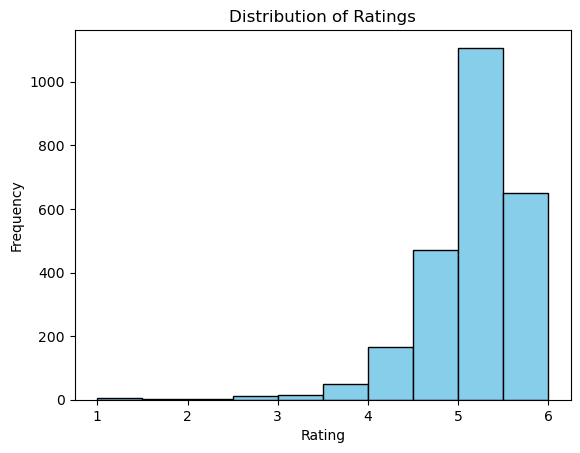

In [26]:
plt.hist(df['rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


# Arrays

In [28]:
# 1. Arrays
# Accessing a specific row or column
first_row = df.iloc[0]  # Accessing the first row
name_column = df['name']  # Accessing the 'name' column
name_column

0                  .CN Chinese
1                       @ Thai
2            @ Thai Restaurant
3            @ Thai Restaurant
4                  @Indian.com
                 ...          
2543    Blue Bengal Restaurant
2544    Blue Bengal Restaurant
2545                  Blue Box
2546      Blue Breeze Fish Bar
2547      Blue Breeze Fish Bar
Name: name, Length: 2548, dtype: object

# Linked Lists

In [29]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

# Creating linked list nodes from the 'name' column
head = None
prev_node = None
for name in df['name']:
    new_node = Node(name)
    if head is None:
        head = new_node
    if prev_node:
        prev_node.next = new_node
    prev_node = new_node

In [30]:
# Traversing the linked list
current_node = head
while current_node:
    print(current_node.data)
    current_node = current_node.next


.CN Chinese
@ Thai
@ Thai Restaurant
@ Thai Restaurant
@Indian.com
007 Takeaway
042 Restaurant & Bar
042 Restaurant & Bar
042 Restaurant & Bar
1 2 3 Chinese
1 2 3 Chinese
100 Degrees Chinese Restaurant
100 Menu
104 Turkish BBQ
109 Ristorante
113 Fish Bar
133 Takeaway
1498 The Spice Affair
168 Chinese & Cantonese Takeaway
1A Wok
1pizza1
1st Choice Pizza
1st Class Pizza
1st Class Pizza
1st Class Pizza
1st Class Pizza & Kebab House
2 4 1 Pizza
2 for 1 Pizza Place
2 Spice
2 Treat U
23rd Street Pizza
23rd Street Pizza
241 Pizza
241 Pizza
2-4-1 Pizza
2-4-1 Pizza
2-4-1 Pizza
280 Degrees African & Nigerian Restaurant
280 Degrees African & Nigerian Restaurant
3 Chef Fish Bar
3 Chefs
3 In 1 Dunoon
3 in 1 Indian & Chipshop Barrhead
3 In 1 Xtra
3 In 1 Xtra
3 In 1 Xtra
321 Pizzas, Kebabs & Burgers
328 Chinese Online
333 Chinese Takeaway
333 Chinese Takeaway
333 Chinese Takeaway1
350 Wok
350 Wok
350 Wok
4 in 1 Express
4 in Love
4500 Miles From Delhi
4 Seasons Pizza & Grill
4550 Miles From Delhi - Co

# Queues

In [31]:
class Queue:
    def __init__(self):
        self.items = []

    def enqueue(self, item):
        self.items.append(item)

    def dequeue(self):
        return self.items.pop(0) if not self.is_empty() else None

    def is_empty(self):
        return len(self.items) == 0

In [32]:
# Creating a queue with restaurant names
restaurant_queue = Queue()
for name in df['name']:
    restaurant_queue.enqueue(name)


In [33]:

# Processing each restaurant name in FIFO order
while not restaurant_queue.is_empty():
    name = restaurant_queue.dequeue()
    print("Processing:", name)

Processing: .CN Chinese
Processing: @ Thai
Processing: @ Thai Restaurant
Processing: @ Thai Restaurant
Processing: @Indian.com
Processing: 007 Takeaway
Processing: 042 Restaurant & Bar
Processing: 042 Restaurant & Bar
Processing: 042 Restaurant & Bar
Processing: 1 2 3 Chinese
Processing: 1 2 3 Chinese
Processing: 100 Degrees Chinese Restaurant
Processing: 100 Menu
Processing: 104 Turkish BBQ
Processing: 109 Ristorante
Processing: 113 Fish Bar
Processing: 133 Takeaway
Processing: 1498 The Spice Affair
Processing: 168 Chinese & Cantonese Takeaway
Processing: 1A Wok
Processing: 1pizza1
Processing: 1st Choice Pizza
Processing: 1st Class Pizza
Processing: 1st Class Pizza
Processing: 1st Class Pizza
Processing: 1st Class Pizza & Kebab House
Processing: 2 4 1 Pizza
Processing: 2 for 1 Pizza Place
Processing: 2 Spice
Processing: 2 Treat U
Processing: 23rd Street Pizza
Processing: 23rd Street Pizza
Processing: 241 Pizza
Processing: 241 Pizza
Processing: 2-4-1 Pizza
Processing: 2-4-1 Pizza
Proce